# Inteligência Artificial
Exercícios práticos com Python

## Algoritmos de busca

### Estudo de caso: Busca em um grafo de cidades da Romênia

In [66]:
# Existem várias formas de representar um grafo computacionalmente, mas como aqui os valores são personalizados, fazemos através de classes
# Basicamente, vamos usar classes para criar uma representação de um grafo através de lista de adjacências

class Vertice: 

    # def __init__(self, rotulo): 
    def __init__(self, rotulo, distancia_objetivo): 
        self.rotulo = rotulo  # Nome da cidade
        self.visitado = False  # Para os nossos algoritmos, estamos colocando um atributo que servirá de parâmetro para sabermos se já visitamos um nó ou não
        self.distancia_objetivo = distancia_objetivo
        self.adjacentes = []  # Lista com nós adjacentes (esses nós serão um objeto também)

    def adiciona_adjacente(self, adjacente):  # Método simples, apenas para adicionar um objeto do tipo "Adjacente" à lista de adjacentes
        self.adjacentes.append(adjacente)

    def mostra_adjacentes(self):  # Percorrendo a lista e mostrando o nome do nó adjacente e custo, para cada nó adjacente do nó atual
        for i in self.adjacentes:
            print(i.vertice.rotulo, i.custo)

In [67]:
# Classe que guardará o vértice (objeto) que é adjacente a outro, juntamente com seu custo (distância entre as duas cidades em questão, 
# a que estamos adicionando e a cidade que estará no objeto Adjacente)
# Para ficar mais claro, faremos essa adição da seguinte forma:
# cidade1.adiciona_adjacente(Adjacente(vertice=cidade2, custo=30))
# Ou seja, a cidade1 está ligada com a cidade2 e a distância entre elas é 30km.
# Lembrando que, tanto a cidade1 quanto a cidade2 são objetos da classe Vertice criados antes de usarmos essa linha de código.
# Assim, conseguimos acessar o objeto cidade2 através do objeto cidade1 (devido à lista de adjacentes, que é um atributo dos vértices)
# e continuar percorrendo o grafo, de cidade em cidade, e também observando a distância entre elas.

class Adjacente:  
    def __init__(self, vertice, custo):
        self.vertice = vertice  # Cidade que será adjacente à outra (também é do tipo "Vertice")
        self.custo = custo  # Distância entre as duas cidades

        # Novo atributo
        self.distancia_aestrela = vertice.distancia_objetivo + self.custo  # Usado no algoritmo A*

In [68]:
# Como vamos trabalhar apenas com um único grafo, não faremos métodos para adicionar uma cidade ao grafo, remover uma cidade etc,
# Tudo será definido nessa classe e, quando quisermos um grafo novo das cidades, apenas instanciamos ela.

class Grafo_Cidades_Romenia:

    # Criando as cidades em si (Vertices). 
    # Cada cidade será um atributo estático da classe (Atributo de classe). Ou seja, caso quisermos,
    # nem precisamos instanciar um objeto dessa classe para ter acesso a esses atributos.
    # perceba que esses atributos não estão dentro de um construtor, por isso são da classe.

    # arad = Vertice('Arad')
    # zerind = Vertice('Zerind')
    # oradea = Vertice('Oradea')
    # sibiu = Vertice('Sibiu')
    # timisoara = Vertice('Timisoara')
    # lugoj = Vertice('Lugoj')
    # mehadia = Vertice('Mehadia')
    # dobreta = Vertice('Dobreta')
    # craiova = Vertice('Craiova')
    # rimnicu = Vertice('Rimnicu')
    # fagaras = Vertice('Fagaras')
    # pitesti = Vertice('Pitesti')
    # bucharest = Vertice('Bucharest')
    # giurgiu = Vertice('Giurgiu')

    arad = Vertice('Arad', 366)
    zerind = Vertice('Zerind', 374)
    oradea = Vertice('Oradea', 380)
    sibiu = Vertice('Sibiu', 253)
    timisoara = Vertice('Timisoara', 329)
    lugoj = Vertice('Lugoj', 244)
    mehadia = Vertice('Mehadia', 241)
    dobreta = Vertice('Dobreta', 242)
    craiova = Vertice('Craiova', 160)
    rimnicu = Vertice('Rimnicu', 193)
    fagaras = Vertice('Fagaras', 178)
    pitesti = Vertice('Pitesti', 98)
    bucharest = Vertice('Bucharest', 0)
    giurgiu = Vertice('Giurgiu', 77)

    # Adicionando as cidades adjacentes. 
    # Aqui apenas temos um código que será executado quando a classe for DEFINIDA (não precisamos de instanciar a classe
    # para que esse código seja executado, pois ele não está dentro do construtor da classe)

    arad.adiciona_adjacente(Adjacente(zerind, 75))
    arad.adiciona_adjacente(Adjacente(sibiu, 140))
    arad.adiciona_adjacente(Adjacente(timisoara, 118))

    zerind.adiciona_adjacente(Adjacente(arad, 75))
    zerind.adiciona_adjacente(Adjacente(oradea, 71))

    oradea.adiciona_adjacente(Adjacente(zerind, 71))
    oradea.adiciona_adjacente(Adjacente(sibiu, 151))

    sibiu.adiciona_adjacente(Adjacente(oradea, 151))
    sibiu.adiciona_adjacente(Adjacente(arad, 140))
    sibiu.adiciona_adjacente(Adjacente(fagaras, 99))
    sibiu.adiciona_adjacente(Adjacente(rimnicu, 80))

    timisoara.adiciona_adjacente(Adjacente(arad, 118))
    timisoara.adiciona_adjacente(Adjacente(lugoj, 111))

    lugoj.adiciona_adjacente(Adjacente(timisoara, 111))
    lugoj.adiciona_adjacente(Adjacente(mehadia, 70))

    mehadia.adiciona_adjacente(Adjacente(lugoj, 70))
    mehadia.adiciona_adjacente(Adjacente(dobreta, 75))

    dobreta.adiciona_adjacente(Adjacente(mehadia, 75))
    dobreta.adiciona_adjacente(Adjacente(craiova, 120))

    craiova.adiciona_adjacente(Adjacente(dobreta, 120))
    craiova.adiciona_adjacente(Adjacente(pitesti, 138))
    craiova.adiciona_adjacente(Adjacente(rimnicu, 146))

    rimnicu.adiciona_adjacente(Adjacente(craiova, 146))
    rimnicu.adiciona_adjacente(Adjacente(sibiu, 80))
    rimnicu.adiciona_adjacente(Adjacente(pitesti, 97))

    fagaras.adiciona_adjacente(Adjacente(sibiu, 99))
    fagaras.adiciona_adjacente(Adjacente(bucharest, 211))

    pitesti.adiciona_adjacente(Adjacente(rimnicu, 97))
    pitesti.adiciona_adjacente(Adjacente(craiova, 138))
    pitesti.adiciona_adjacente(Adjacente(bucharest, 101))

    bucharest.adiciona_adjacente(Adjacente(fagaras, 211))
    bucharest.adiciona_adjacente(Adjacente(pitesti, 101))
    bucharest.adiciona_adjacente(Adjacente(giurgiu, 90))

Segue uma representação visual do grafo que foi criado na célula anterior:

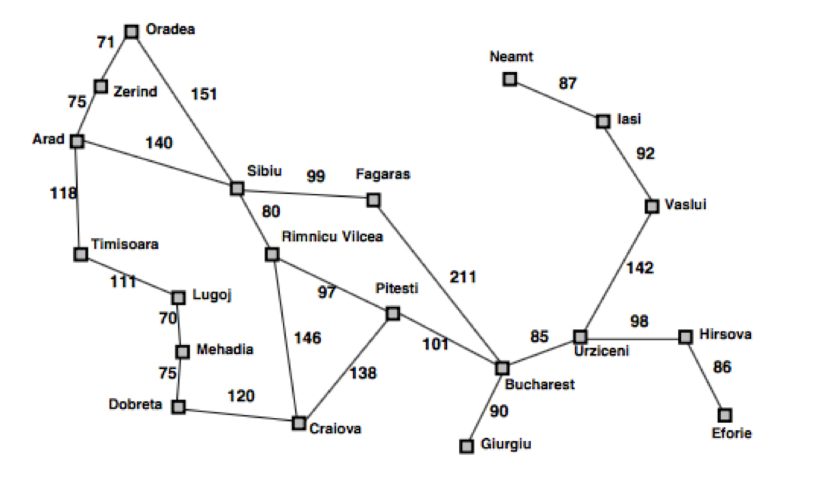

Obs: Como o problema que será estudado envolve os caminhos possíveis para ir de Arad até Bucharest, eliminamos o subgrafo das cidades à direita de Bucharest (Urziceni...), portanto não haverá Adjacentes nem Vertices com essas cidades.

In [69]:
Grafo_Cidades_Romenia.arad.mostra_adjacentes()  # Mostrando lista de adjacência de arad

Zerind 75
Sibiu 140
Timisoara 118


#### Código de apoio - Vetor ordenado

In [70]:
import numpy as np
class VetorOrdenado:

  def __init__(self, capacidade):
    self.capacidade = capacidade
    self.ultima_posicao = -1
    # Mudança no tipo de dados
    self.valores = np.empty(self.capacidade, dtype=object)

  # Referência para o vértice e comparação com a distância para o objetivo
  def insere(self, vertice):
    if self.ultima_posicao == self.capacidade - 1:
      print('Capacidade máxima atingida')
      return
    posicao = 0
    for i in range(self.ultima_posicao + 1):
      posicao = i
      if self.valores[i].distancia_objetivo > vertice.distancia_objetivo:
        break
      if i == self.ultima_posicao:
        posicao = i + 1
    x = self.ultima_posicao
    while x >= posicao:
      self.valores[x + 1] = self.valores[x]
      x -= 1
    self.valores[posicao] = vertice
    self.ultima_posicao += 1

  def imprime(self):
    if self.ultima_posicao == -1:
      print('O vetor está vazio')
    else:
      for i in range(self.ultima_posicao + 1):
        print(i, ' - ', self.valores[i].rotulo, ' - ', self.valores[i].distancia_objetivo)


In [71]:
grafo = Grafo_Cidades_Romenia()

In [72]:
vetor = VetorOrdenado(5)
vetor.insere(grafo.arad)
vetor.insere(grafo.craiova)
vetor.insere(grafo.bucharest)
vetor.insere(grafo.dobreta)

In [73]:
vetor.imprime()

0  -  Bucharest  -  0
1  -  Craiova  -  160
2  -  Dobreta  -  242
3  -  Arad  -  366


In [74]:
vetor.insere(grafo.lugoj)
vetor.imprime()

0  -  Bucharest  -  0
1  -  Craiova  -  160
2  -  Dobreta  -  242
3  -  Lugoj  -  244
4  -  Arad  -  366


In [75]:
vetor.valores[0], vetor.valores[0].rotulo

(<__main__.Vertice at 0x220a56f2a10>, 'Bucharest')

#### Busca Gulosa

Já está relacionada a inteligência artificial
- Usa a Heurística da distância em linha reta entre cada cidade até Bucharest

In [76]:
class Gulosa:
  def __init__(self, objetivo):
    self.objetivo = objetivo
    self.encontrado = False

  def buscar(self, atual):
    print('-------')
    print('Atual: {}'.format(atual.rotulo))
    atual.visitado = True

    if atual == self.objetivo:
      self.encontrado = True
    else:
      vetor_ordenado = VetorOrdenado(len(atual.adjacentes))
      for adjacente in atual.adjacentes:
        if adjacente.vertice.visitado == False:
          adjacente.vertice.visitado == True
          vetor_ordenado.insere(adjacente.vertice)
      vetor_ordenado.imprime()

      if vetor_ordenado.valores[0] != None:
        self.buscar(vetor_ordenado.valores[0])

In [77]:
grafo = Grafo_Cidades_Romenia()
busca_gulosa = Gulosa(grafo.bucharest)  # O ponto de chegada deve sempre ser Bucharest, porque a heurística é a distância
                                        # em linha reta até Bucharest
busca_gulosa.buscar(grafo.arad)         # Cidade inicial. A cidade inicial poderia ser outra.

-------
Atual: Arad
0  -  Sibiu  -  253
1  -  Timisoara  -  329
2  -  Zerind  -  374
-------
Atual: Sibiu
0  -  Fagaras  -  178
1  -  Rimnicu  -  193
2  -  Oradea  -  380
-------
Atual: Fagaras
0  -  Bucharest  -  0
-------
Atual: Bucharest


#### Busca A* (A Estrela)

Preparando para a busca: criando vetor ordenado de adjacentes:

In [78]:
import numpy as np
class VetorOrdenadoAdj:
  
  def __init__(self, capacidade):
    self.capacidade = capacidade
    self.ultima_posicao = -1
    # Mudança no tipo de dados
    self.valores = np.empty(self.capacidade, dtype=object)

  # Referência para o vértice e comparação com a distância para o objetivo
  def insere(self, adjacente):
    if self.ultima_posicao == self.capacidade - 1:
      print('Capacidade máxima atingida')
      return
    posicao = 0
    for i in range(self.ultima_posicao + 1):
      posicao = i
      if self.valores[i].distancia_aestrela > adjacente.distancia_aestrela:
        break
      if i == self.ultima_posicao:
        posicao = i + 1
    x = self.ultima_posicao
    while x >= posicao:
      self.valores[x + 1] = self.valores[x]
      x -= 1
    self.valores[posicao] = adjacente
    self.ultima_posicao += 1

  def imprime(self):
    if self.ultima_posicao == -1:
      print('O vetor está vazio')
    else:
      for i in range(self.ultima_posicao + 1):
        print(i, ' : ', self.valores[i].vertice.rotulo, ' | Custo ', 
              self.valores[i].custo, ' | Distância Objetivo ', 
              self.valores[i].vertice.distancia_objetivo, ' | Distância A* ',
              self.valores[i].distancia_aestrela)  

In [79]:
grafo = Grafo_Cidades_Romenia()
grafo.arad.adjacentes

In [80]:
grafo.arad.adjacentes[0].vertice.rotulo, grafo.arad.adjacentes[0].vertice.distancia_objetivo

('Zerind', 374)

In [81]:
grafo.arad.adjacentes[0].distancia_aestrela, grafo.arad.adjacentes[0].custo

(449, 75)

In [82]:
vetor = VetorOrdenadoAdj(20)
vetor.insere(grafo.arad.adjacentes[0])
vetor.insere(grafo.arad.adjacentes[1])
vetor.insere(grafo.arad.adjacentes[2])

In [83]:
vetor.imprime()

0  :  Sibiu  | Custo  140  | Distância Objetivo  253  | Distância A*  393
1  :  Timisoara  | Custo  118  | Distância Objetivo  329  | Distância A*  447
2  :  Zerind  | Custo  75  | Distância Objetivo  374  | Distância A*  449


In [84]:
class AEstrela:
  def __init__(self, objetivo):
    self.objetivo = objetivo
    self.encontrado = False

  def buscar(self, atual):
    print('------------------')
    print('Atual: {}'.format(atual.rotulo))
    atual.visitado = True

    if atual == self.objetivo:
      self.encontrado = True
    else:
      vetor_ordenado = VetorOrdenadoAdj(len(atual.adjacentes))
      for adjacente in atual.adjacentes:
        if adjacente.vertice.visitado == False:
          adjacente.vertice.visitado = True
          vetor_ordenado.insere(adjacente)
      vetor_ordenado.imprime()

      if vetor_ordenado.valores[0] != None:
        self.buscar(vetor_ordenado.valores[0].vertice)

In [85]:
busca_aestrela = AEstrela(grafo.bucharest)
busca_aestrela.buscar(grafo.arad)

------------------
Atual: Arad
0  :  Timisoara  | Custo  118  | Distância Objetivo  329  | Distância A*  447
1  :  Zerind  | Custo  75  | Distância Objetivo  374  | Distância A*  449
------------------
Atual: Timisoara
0  :  Lugoj  | Custo  111  | Distância Objetivo  244  | Distância A*  355
------------------
Atual: Lugoj
0  :  Mehadia  | Custo  70  | Distância Objetivo  241  | Distância A*  311
------------------
Atual: Mehadia
0  :  Dobreta  | Custo  75  | Distância Objetivo  242  | Distância A*  317
------------------
Atual: Dobreta
0  :  Craiova  | Custo  120  | Distância Objetivo  160  | Distância A*  280
------------------
Atual: Craiova
0  :  Pitesti  | Custo  138  | Distância Objetivo  98  | Distância A*  236
1  :  Rimnicu  | Custo  146  | Distância Objetivo  193  | Distância A*  339
------------------
Atual: Pitesti
O vetor está vazio


### Exercício: Busca em um grafo de cidades brasileiras

O objetivo desta tarefa é utilizar o mesmo código fonte das aulas anteriores para construir o exemplo abaixo. A cidade de origem é Porto União e a cidade de destino é Curitiba. No mapa abaixo você pode visualizar as distâncias pela estrada entre cada uma das cidades


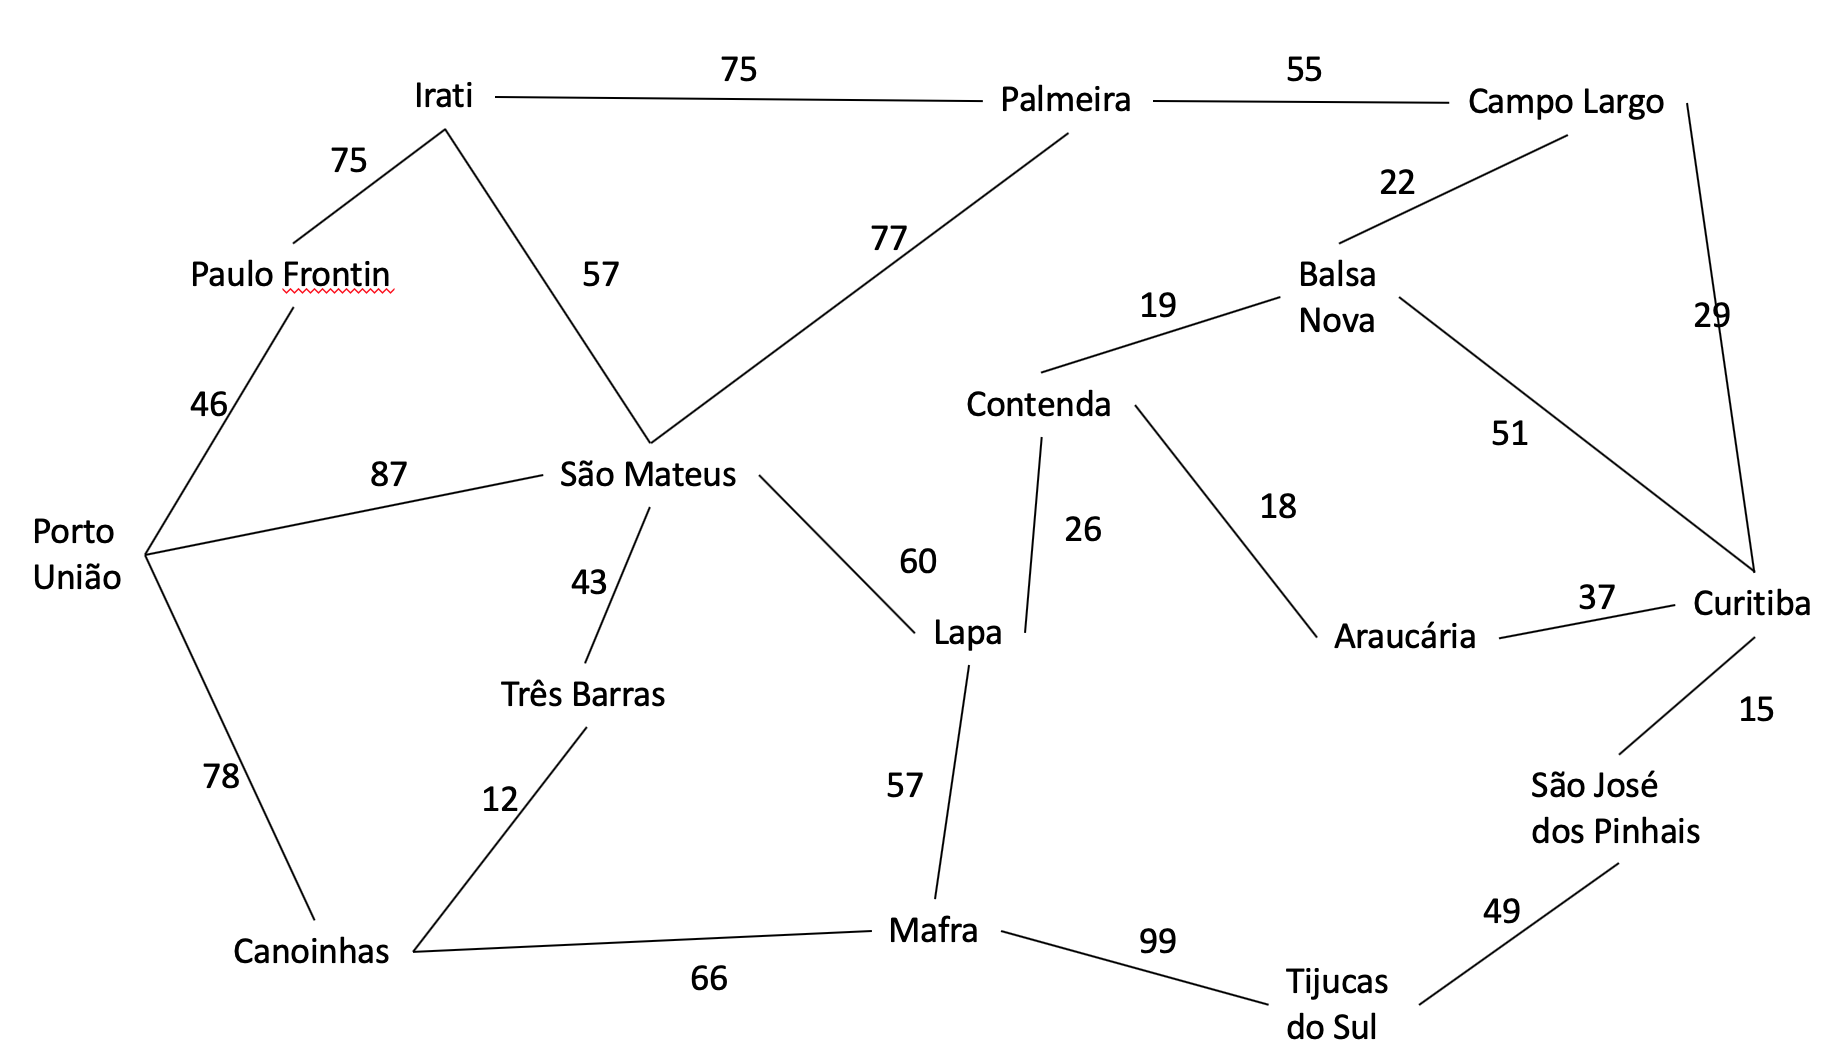


Abaixo você pode observar a tabela com as heurísticas com a distância em linha reta entre todas as cidades e o objetivo (Curitiba)

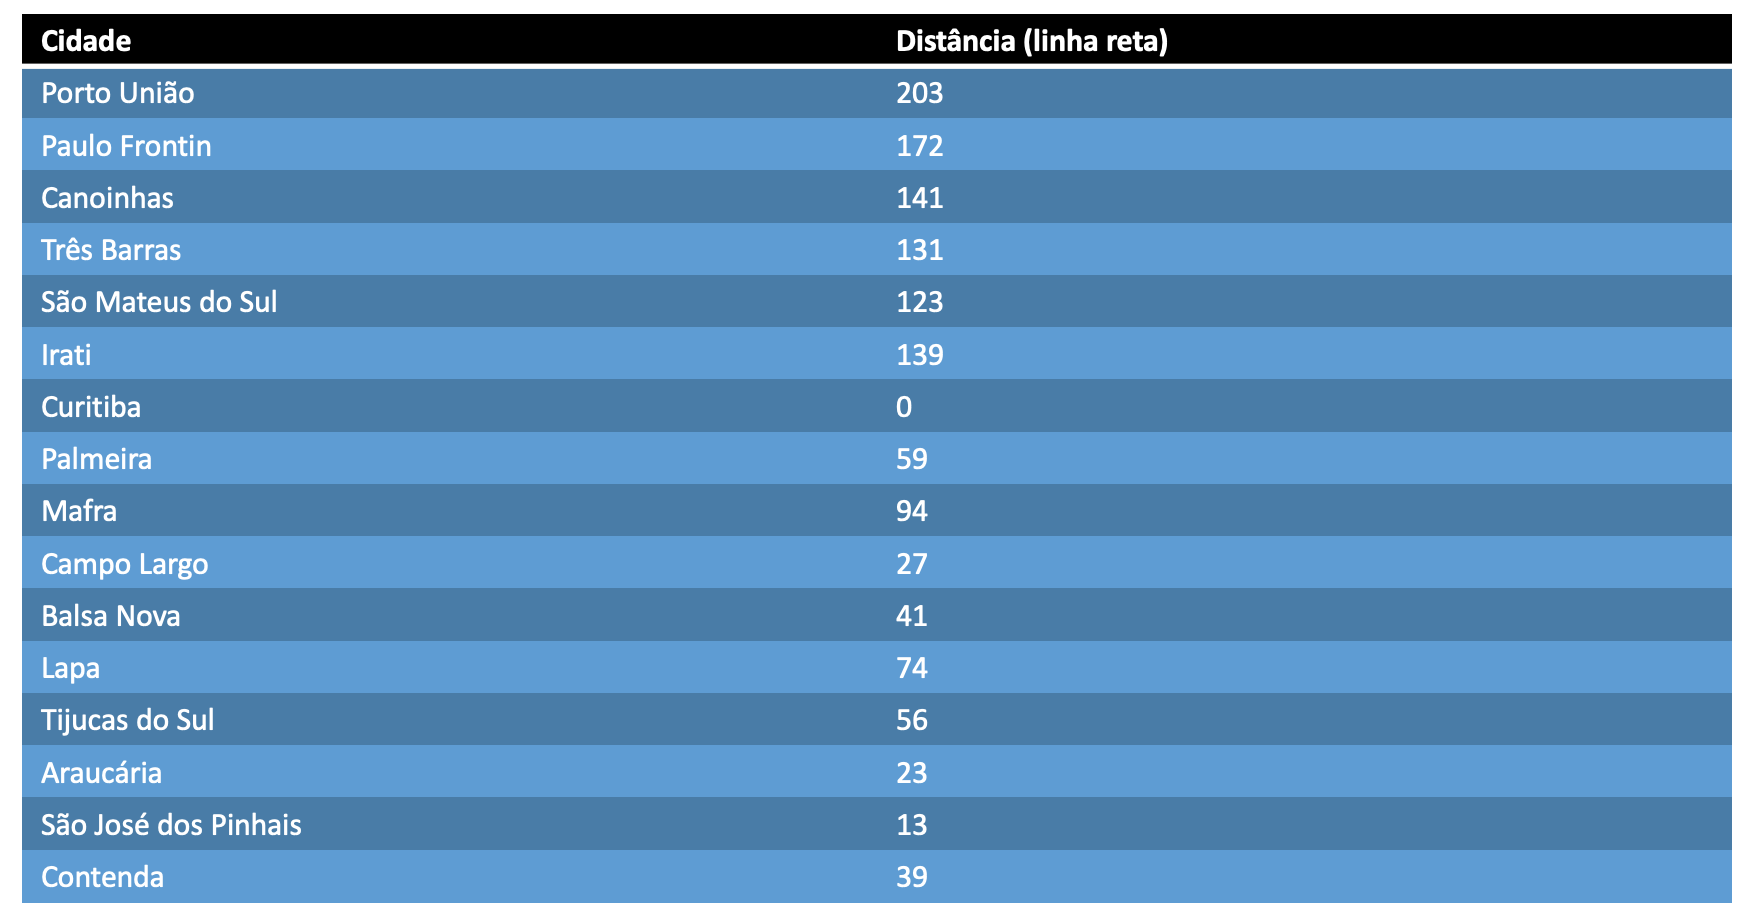

#### Código do Grafo

In [27]:
class NovoVertice:

    def __init__(self, rotulo, distancia_objetivo):
        self.rotulo = rotulo
        self.distancia_objetivo = distancia_objetivo
        self.visitado = False
        self.adjacentes = []
    
    def adiciona_adjacente(self, adjacente):
        self.adjacentes.append(adjacente)
    
    def mostra_adjacentes(self):
        for i in self.adjacentes:
            print(i.vertice.rotulo, i.custo)
    
    def __lt__(self, other):
        if not isinstance(other, NovoVertice):
            return NotImplemented
        return self.rotulo < other.rotulo

class NovoAdjacente:

    def __init__(self, vertice, custo):
        self.vertice = vertice
        self.custo = custo

class GrafoParana:
    
    portoUniao = NovoVertice("Porto União", 203)
    pauloFrontin = NovoVertice("Paulo Frontin", 172)
    canoinhas = NovoVertice("Canoinhas", 141)
    irati = NovoVertice("Irati", 139)
    palmeira = NovoVertice("Palmeira", 59)
    campoLargo = NovoVertice("Campo Largo", 27)
    curitiba = NovoVertice("Curitiba", 0)
    balsaNova = NovoVertice("Balsa Nova", 41)
    araucaria = NovoVertice("Araucária", 23)
    saoJose = NovoVertice("São José dos Pinhais", 13)
    contenda = NovoVertice("Contenda", 39)
    mafra = NovoVertice("Mafra", 94)
    tijucas = NovoVertice("Tijucas do Sul", 56)
    lapa = NovoVertice("Lapa", 74)
    saoMateus = NovoVertice("São Mateus do Sul", 123)
    tresBarras = NovoVertice("Três Barras", 131)


    portoUniao.adiciona_adjacente(NovoAdjacente(pauloFrontin, 46))  
    portoUniao.adiciona_adjacente(NovoAdjacente(canoinhas, 78))
    portoUniao.adiciona_adjacente(NovoAdjacente(saoMateus, 87))
        
    pauloFrontin.adiciona_adjacente(NovoAdjacente(portoUniao, 46))
    pauloFrontin.adiciona_adjacente(NovoAdjacente(irati, 75))
        
    canoinhas.adiciona_adjacente(NovoAdjacente(portoUniao, 78))
    canoinhas.adiciona_adjacente(NovoAdjacente(tresBarras, 12))
    canoinhas.adiciona_adjacente(NovoAdjacente(mafra, 66))
        
    irati.adiciona_adjacente(NovoAdjacente(pauloFrontin, 75))
    irati.adiciona_adjacente(NovoAdjacente(palmeira, 75))
    irati.adiciona_adjacente(NovoAdjacente(saoMateus, 57))
        
    palmeira.adiciona_adjacente(NovoAdjacente(irati, 75))
    palmeira.adiciona_adjacente(NovoAdjacente(saoMateus, 77))
    palmeira.adiciona_adjacente(NovoAdjacente(campoLargo, 55))
        
    campoLargo.adiciona_adjacente(NovoAdjacente(palmeira, 55))
    campoLargo.adiciona_adjacente(NovoAdjacente(balsaNova, 22))
    campoLargo.adiciona_adjacente(NovoAdjacente(curitiba, 29))
        
    curitiba.adiciona_adjacente(NovoAdjacente(campoLargo, 29))
    curitiba.adiciona_adjacente(NovoAdjacente(balsaNova, 51))
    curitiba.adiciona_adjacente(NovoAdjacente(araucaria, 37))
    curitiba.adiciona_adjacente(NovoAdjacente(saoJose, 15))
        
    balsaNova.adiciona_adjacente(NovoAdjacente(curitiba, 51))
    balsaNova.adiciona_adjacente(NovoAdjacente(campoLargo, 22))
    balsaNova.adiciona_adjacente(NovoAdjacente(contenda, 19))
        
    araucaria.adiciona_adjacente(NovoAdjacente(curitiba, 37))
    araucaria.adiciona_adjacente(NovoAdjacente(contenda, 18))
        
    saoJose.adiciona_adjacente(NovoAdjacente(curitiba, 15))
    saoJose.adiciona_adjacente(NovoAdjacente(tijucas, 49))
        
    contenda.adiciona_adjacente(NovoAdjacente(balsaNova, 19))
    contenda.adiciona_adjacente(NovoAdjacente(araucaria, 18))
    contenda.adiciona_adjacente(NovoAdjacente(lapa, 26))

    mafra.adiciona_adjacente(NovoAdjacente(tijucas, 99))
    mafra.adiciona_adjacente(NovoAdjacente(lapa, 57))
    mafra.adiciona_adjacente(NovoAdjacente(canoinhas, 66))
        
    tijucas.adiciona_adjacente(NovoAdjacente(mafra, 99))
    tijucas.adiciona_adjacente(NovoAdjacente(saoJose, 49))

    lapa.adiciona_adjacente(NovoAdjacente(contenda, 26))
    lapa.adiciona_adjacente(NovoAdjacente(saoMateus, 60))
    lapa.adiciona_adjacente(NovoAdjacente(mafra, 57))
        
    saoMateus.adiciona_adjacente(NovoAdjacente(palmeira, 77))
    saoMateus.adiciona_adjacente(NovoAdjacente(irati, 57))
    saoMateus.adiciona_adjacente(NovoAdjacente(lapa, 60))
    saoMateus.adiciona_adjacente(NovoAdjacente(tresBarras, 43))
    saoMateus.adiciona_adjacente(NovoAdjacente(portoUniao, 87))
        
    tresBarras.adiciona_adjacente(NovoAdjacente(saoMateus, 43))
    tresBarras.adiciona_adjacente(NovoAdjacente(canoinhas, 12))
    
        

#### Busca Gulosa

In [28]:
class MinhaBuscaGulosa:
    
    def __init__(self, objetivo):
        self.objetivo = objetivo
        self.encontrado = False
    
    def buscar(self, atual):
        atual.visitado = True

        if atual == self.objetivo:
            return
        
        vetor = []
        for adjacente in atual.adjacentes:
            if adjacente.vertice.visitado == False:
                adjacente.vertice.visitado = True
                vetor.append(adjacente.vertice)
                print(adjacente.vertice.rotulo, adjacente.vertice.distancia_objetivo, end=' | ')
        print()

        if len(vetor) > 0:
            vetor.sort()
            self.buscar(vetor[0])

In [29]:
grafo_parana = GrafoParana()
busca_gulosa_parana = MinhaBuscaGulosa(grafo_parana.curitiba)
busca_gulosa_parana.buscar(grafo_parana.portoUniao)

Paulo Frontin 172 | Canoinhas 141 | São Mateus do Sul 123 | 
Três Barras 131 | Mafra 94 | 
Tijucas do Sul 56 | Lapa 74 | 
Contenda 39 | 
Balsa Nova 41 | Araucária 23 | 
Curitiba 0 | 


#### Busca A*